This project we are using the FIFA 21 COMPLETE PLAYER DATASET to estimate the market value of the player.


Here are the steps I am follwing: 
1. Understand the data - have an overview of the data to understand what columns do we have in the data set 
2. Define the goal of the project - to estimate the market value of the player
3. Data Cleaning: standalize columns' names; Deal with NaN values; Categorical featuring; Numerical featuring
4. Processing Data: clean out outliers, normalization
5. Building the model! 

I have also used trello to track my process as well. Please see this link: 

In [186]:
#Importing libraries that I will use

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [187]:
#Importing the dataset
##Step 1 understanding the dataset
data=pd.read_csv('fifa21_male2.csv')
data


/usr/local/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (78) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ID,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,2,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,16,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,27,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,36,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,41,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,259088,A. Medioub,22,64,France,CD Tondela,66,CB,CB,https://cdn.sofifa.com/players/259/088/20_120.png,...,55+2,55+2,54+2,57+2,64+2,64+2,64+2,57+2,12+2,Male
17121,259090,W. Rickard,18,56,Wales,Burnley,58,CAM,CAM CM,https://cdn.sofifa.com/players/259/090/20_120.png,...,52+2,52+2,53+2,52+2,49+2,49+2,49+2,52+2,17+2,Male
17122,259091,C. Barrett,18,56,England,Burnley,56,RB,RB,https://cdn.sofifa.com/players/259/091/20_120.png,...,50+2,50+2,54+2,54+2,54+2,54+2,54+2,54+2,14+2,Male
17123,259101,J. Gazibegović,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,https://cdn.sofifa.com/players/259/101/20_120.png,...,58+2,58+2,60+2,60+2,58+2,58+2,58+2,60+2,16+2,Male


In [188]:
data.dtypes

ID              int64
Name           object
Age             int64
OVA             int64
Nationality    object
                ...  
CB             object
RCB            object
RB             object
GK             object
Gender         object
Length: 107, dtype: object

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17125 entries, 0 to 17124
Columns: 107 entries, ID to Gender
dtypes: float64(10), int64(45), object(52)
memory usage: 14.0+ MB


In [190]:
##Select variables that are relevant to the business case
data.corr()
##But there are too many columns. 

,ID,Age,OVA,BOV,POT,Growth,Attacking,Crossing,Finishing,Heading Accuracy,...,GK Positioning,GK Reflexes,Total Stats,Base Stats,PAC,SHO,PAS,DRI,DEF,PHY
ID,1.000000,-0.743844,-0.431079,-0.385713,0.042604,0.553757,-0.178002,-0.152858,-0.110723,-0.148036,...,-0.106509,-0.094745,-0.236634,-0.339341,0.175293,-0.284713,-0.366366,-0.232583,-0.165248,-0.295857
Age,-0.743844,1.000000,0.517099,0.456734,-0.237619,-0.850204,0.183954,0.151022,0.105311,0.172793,...,0.134369,0.121822,0.280383,0.414897,-0.177291,0.309438,0.396082,0.241027,0.223184,0.436462
OVA,-0.431079,0.517099,1.000000,0.985877,0.592268,-0.595585,0.431238,0.386334,0.304012,0.305553,...,0.044653,0.037284,0.607676,0.832618,0.201319,0.487060,0.699229,0.643427,0.344906,0.543354
BOV,-0.385713,0.456734,0.985877,1.000000,0.628323,-0.542890,0.464329,0.400046,0.336488,0.335677,...,-0.000933,-0.008819,0.635037,0.830127,0.212889,0.478573,0.689975,0.640746,0.349906,0.535579
POT,0.042604,-0.237619,0.592268,0.628323,1.000000,0.294499,0.233866,0.210944,0.173281,0.137199,...,-0.004015,-0.005215,0.329178,0.474763,0.259294,0.244481,0.395773,0.445004,0.170562,0.159959
Growth,0.553757,-0.850204,-0.595585,-0.542890,0.294499,1.000000,-0.278316,-0.247910,-0.187820,-0.225620,...,-0.056963,-0.049419,-0.392559,-0.514210,0.019730,-0.333941,-0.434753,-0.319487,-0.239034,-0.484974
Attacking,-0.178002,0.183954,0.431238,0.464329,0.233866,-0.278316,1.000000,0.843765,0.878467,0.702717,...,-0.755959,-0.760922,0.903393,0.428602,0.180335,0.351248,0.373439,0.381863,0.106978,0.104102
Crossing,-0.152858,0.151022,0.386334,0.400046,0.210944,-0.247910,0.843765,1.000000,0.651366,0.433727,...,-0.643240,-0.647120,0.850710,0.485306,0.304307,0.212267,0.505456,0.447862,0.219576,-0.005856
Finishing,-0.110723,0.105311,0.304012,0.336488,0.173281,-0.187820,0.878467,0.651366,1.000000,0.450864,...,-0.570458,-0.573698,0.707772,0.360845,0.279985,0.609581,0.330078,0.471745,-0.262044,-0.066274
Heading Accuracy,-0.148036,0.172793,0.305553,0.335677,0.137199,-0.225620,0.702717,0.433727,0.450864,1.000000,...,-0.708747,-0.713541,0.608338,0.107478,-0.174275,-0.121638,-0.094879,-0.149112,0.386659,0.400915


In [191]:
#Step 2: Goal defined
#Select the related columns to the business case and created new dataframe called "data1"
data1 =data[["Age", "OVA", "Nationality","Club", "BOV","BP","Position","POT","Height","Weight","foot","Joined","Value","Wage","Release Clause","Total Stats","Base Stats"]]

In [192]:
data1.dtypes

Age                int64
OVA                int64
Nationality       object
Club              object
BOV                int64
BP                object
Position          object
POT                int64
Height            object
Weight            object
foot              object
Joined            object
Value             object
Wage              object
Release Clause    object
Total Stats        int64
Base Stats         int64
dtype: object

In [193]:
data1

,Age,OVA,Nationality,Club,BOV,BP,Position,POT,Height,Weight,foot,Joined,Value,Wage,Release Clause,Total Stats,Base Stats
0,33,69,Italy,Udinese,71,LWB,LM,69,"6'0""",181lbs,Left,"Jul 1, 2008",€625K,€7K,€0,1929,408
1,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,71,"5'10""",143lbs,Right,"Jul 19, 2014",€600K,€7K,€1.1M,1906,385
2,33,71,England,Coventry City,71,CAM,CAM RM RW LM,71,"5'9""",161lbs,Right,"Jan 7, 2016",€1.1M,€15K,€0,1770,354
3,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,82,"5'11""",165lbs,Right,NaN,€0,€0,€0,1348,369
4,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,81,"5'7""",150lbs,Right,"Jul 16, 2018",€5.5M,€12K,€7.2M,2014,420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,France,CD Tondela,66,CB,CB,69,"6'6""",165lbs,Right,"Sep 29, 2020",€550K,€2K,€0,1367,302
17121,18,56,Wales,Burnley,58,CAM,CAM CM,66,"5'10""",170lbs,Right,"Aug 20, 2020",€130K,€3K,€273K,1529,319
17122,18,56,England,Burnley,56,RB,RB,67,"5'9""",154lbs,Right,"Aug 20, 2020",€130K,€2K,€273K,1430,303
17123,20,62,Bosnia Herzegovina,SK Sturm Graz,62,RB,RB LB,73,"5'9""",148lbs,Right,"Sep 30, 2020",€475K,€3K,€784K,1579,335


Step 3: Data cleaning

In [196]:

##rename all the column
data1.columns = data1.columns.str.lower()
data1.columns = data1.columns.str.replace(' ', '_')
data1.columns

Index(['age', 'ova', 'nationality', 'club', 'bov', 'bp', 'position', 'pot',
       'height', 'weight', 'foot', 'joined', 'value', 'wage', 'release_clause',
       'total_stats', 'base_stats'],
      dtype='object')

In [194]:
# Checking null value in the dataset
data1.isna().sum()
nulls_data = pd.DataFrame(round(data1.isna().sum()/len(data1)*100,2))
nulls_data

,0
Age,0.00
OVA,0.00
Nationality,0.00
Club,0.13
BOV,0.00
BP,0.00
Position,2.41
POT,0.00
Height,0.00
Weight,0.00


In [181]:
data1.joined_days.isna()

0        False
1        False
2        False
3         True
4        False
         ...  
17120    False
17121    False
17122    False
17123    False
17124    False
Name: joined_days, Length: 17125, dtype: bool

In [331]:
##drop null value
data1=data1[~(data1.joined_days.isna())]

In [198]:
#check the null percentage of each column and drop those with more then 20% nulls.

max_number_of_nas = len(data1) * 0.2
data1 = data1.loc[:, (data1.isnull().sum(axis=0) <= max_number_of_nas)]

Now I am going to clean up the numerical columns, and encode the categorical columns. 
Numerical Columns that need to be cleaned:
height, weight, joined, value, wage, release_clause

Cleaning Numerical columns

In [199]:
##Cleaning Weight columns by removing 'ibs'
data1['weight']=data1['weight'].str.strip('lbs').astype('int')

In [200]:
##Cleaning the height
def parse_ht(ht):
    # format: 7' 0.0"
    ht_ = ht.split("'")
    ft_ = float(ht_[0])
    in_ = float(ht_[1].replace("\"",""))
    return (12*ft_) + in_
data1["height"] = data1["height"].apply(lambda x:parse_ht(x))

In [201]:
##building a convertor for K, M . 
def km_convertor(a):
    if a is not None: 
        a1=a.strip('€')
        a_converted=a1.replace('K', '000')
        a_final = a_converted.replace('.','').replace('M','000000')
    else:
        a_final = None
    return a_final


In [202]:
##Convert columns with K,M to numbers
data1['value'] = data1['value'].apply(lambda x:km_convertor(x)).astype('int')
data1['wage'] = data1['wage'].apply(lambda x:km_convertor(x)).astype('int')
data1['release_clause'] = data1['release_clause'].apply(lambda x:km_convertor(x)).astype('int')


In [203]:
##Now we turn "joined" to a numerical columns - how many days did they join until 2021 Dec 31st. 

from datetime import datetime as dt
data1['joined']=pd.to_datetime(data1['joined'])
date_str = '2021/12/31'
end_of_2021=dt.strptime(date_str, '%Y/%m/%d')

data1['joined_days'] = end_of_2021 - data1['joined']
data1['joined_days'] = data1['joined_days'].dt.days
data1 = data1.drop('joined', 1)

/var/folders/76/00lbr5fj2gs70r2y8qtskxk00000gn/T/ipykernel_23173/4070803947.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data1 = data1.drop('joined', 1)


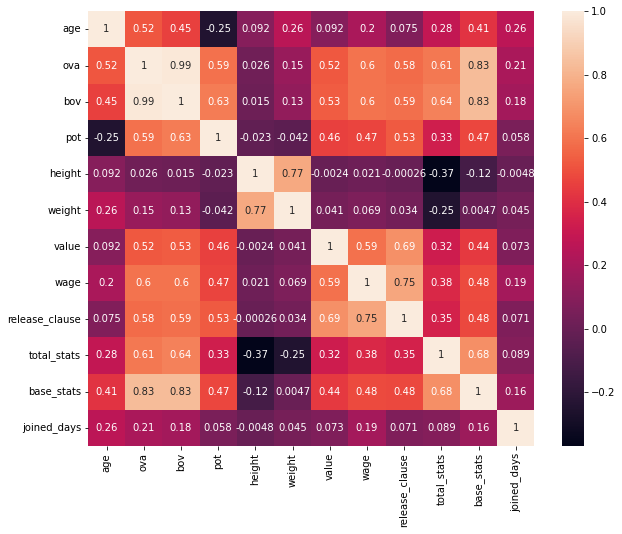

In [205]:
##checking the correlation of the numerical columns.
corr_matrix=data1.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

##After checking the numerical columns and realized that some columsn are highly correlated:
1. ova and bov, decided to drop bov 
2. height and weight, decided to drop weight
3. wage and release_clause, decied to drop release_clause
4. total_stats and base_stats, decided to drop base_stats
5. wage and value: in this case, we need to drop wage.

In [206]:
data1 = data1.drop(['bov','weight','release_clause','base_stats','wage'], axis=1)

In [268]:
##cleaning categorical columns
##Encoding 'foot' column 
##dummy variable: https://socialsciences.mcmaster.ca/jfox/Courses/SPIDA/dummy-regression-notes.pdf
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
data1['foot'] = data1['foot'].astype('category')
data1 = pd.get_dummies(data1, columns=['foot'])



In [241]:
# realizing the BP feature is already providing the information I need from position, I decided to drop the column.
data1 = data1.drop(['position'], axis=1)

In [242]:
##define a fucntion to clean column Club
def encoding_club(value):
    s1=int(data1['club'].nunique()*0.25)
    s2=int(data1['club'].nunique()*0.50)
    s3=int(data1['club'].nunique()*0.75)
    if value in data1['club'].value_counts()[:s1].index:
        return 0
    elif value in data1['club'].value_counts()[s1:s2].index:
        return 1
    elif value in data1['club'].value_counts()[s2:s3].index:
        return 2
    else: return 3
    

In [243]:
##clean the column club
data1['club']=data1.club.map(lambda x: encoding_club(x))

In [244]:
##define a fucntion to clean column nationality
def encoding_nationality(value):
    n1=int(data1['nationality'].nunique()*0.25)
    n2=int(data1['nationality'].nunique()*0.50)
    n3=int(data1['nationality'].nunique()*0.75)
    if value in data1['nationality'].value_counts()[:n1].index:
        return 0
    elif value in data1['nationality'].value_counts()[n1:n2].index:
        return 1
    elif value in data1['nationality'].value_counts()[n2:n3].index:
        return 2
    else: return 3

In [245]:
##clean the column nationality
data1.nationality=data1.nationality.map(lambda x: encoding_nationality(x))

In [249]:
data1_cat=data1[['bp','foot','nationality','club']]

##Exploration Data Analysis

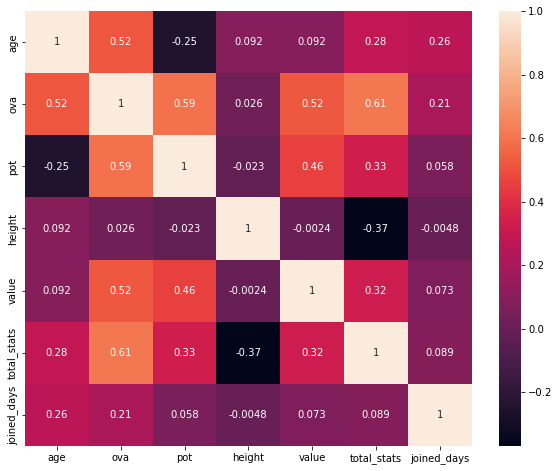

In [207]:
corr_matrix=data1.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

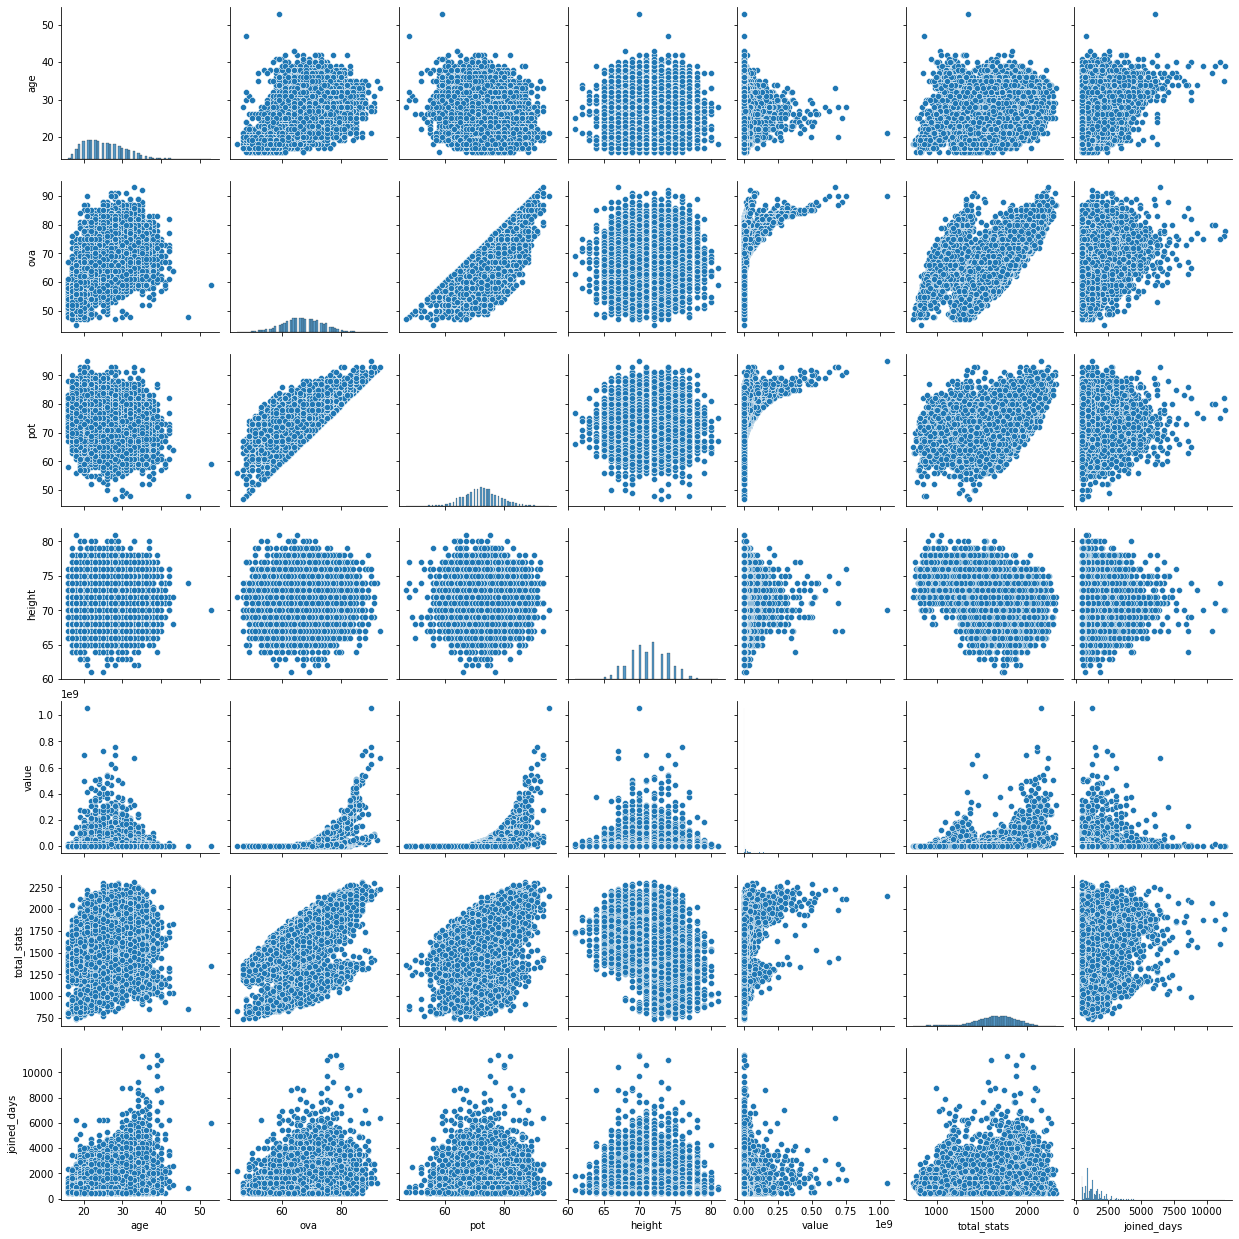

In [208]:

sns.pairplot(data1)

In [209]:
data1_num = data1.select_dtypes(np.number)


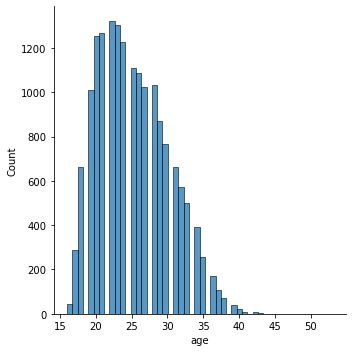

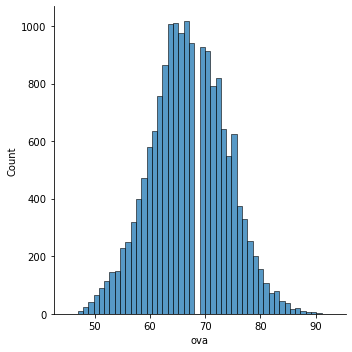

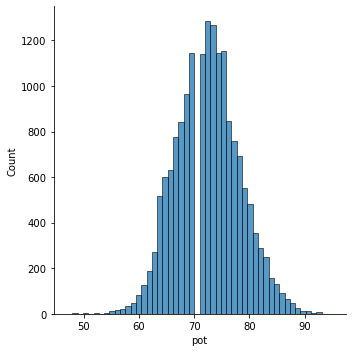

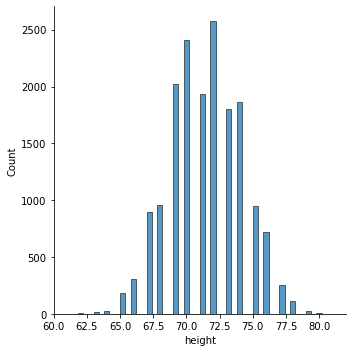

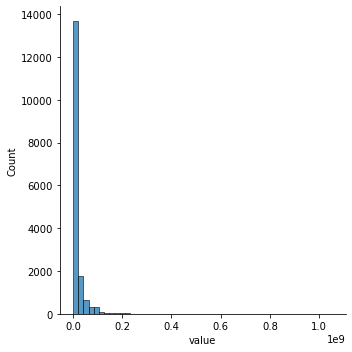

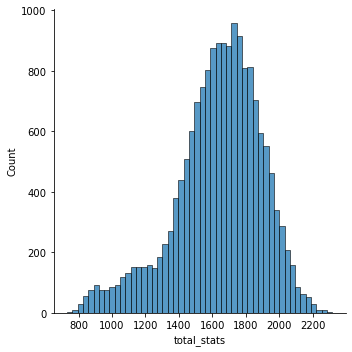

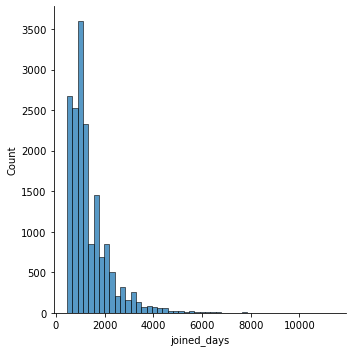

In [239]:
# Ploting the numerical values:
for i in data1_num.columns:
    sns.displot(data = data1_num[i], bins = 50)
plt.show()

In [218]:
data1_num.describe()

,age,ova,pot,height,value,total_stats,joined_days
count,17067.000000,17067.000000,17067.000000,17067.000000,1.706700e+04,17067.000000,17067.000000
mean,25.255698,66.952481,72.472784,71.346692,1.519013e+07,1632.202320,1356.454386
std,4.930444,6.841916,5.744063,2.711894,3.878458e+07,259.975178,897.644470
min,16.000000,45.000000,47.000000,61.000000,0.000000e+00,731.000000,456.000000
25%,21.000000,62.000000,69.000000,69.000000,3.750000e+05,1493.000000,840.500000
50%,25.000000,67.000000,72.000000,71.000000,8.000000e+05,1660.000000,1095.000000
75%,29.000000,72.000000,76.000000,73.000000,1.500000e+07,1812.000000,1644.000000
max,53.000000,93.000000,95.000000,81.000000,1.055000e+09,2316.000000,11353.000000


Values are normally distributed in most of the columns, except value and joined_days. Especially with value, there are too many value is 0,

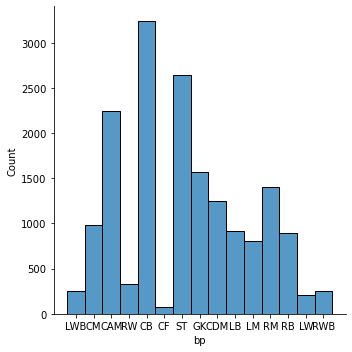

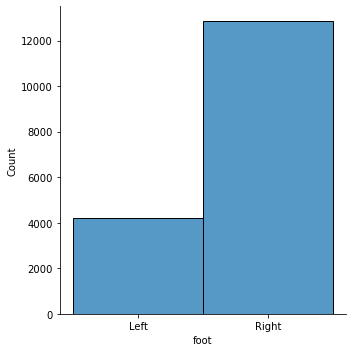

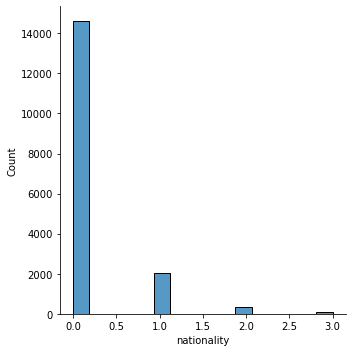

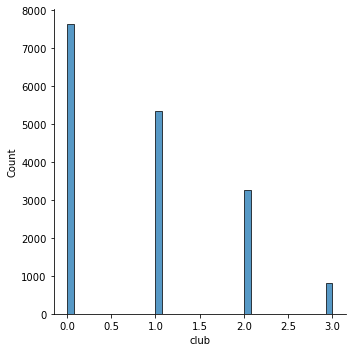

In [255]:
# Ploting the categorical values:
for i in data1_cat.columns:
    sns.displot(data = data1_cat[i])
plt.show()


In [256]:
#encoding bp column
data1['bp'].value_counts()
data1 = pd.get_dummies(data1, columns=['bp'])


In [257]:
data1 = pd.get_dummies(data1, columns=['nationality','club'])

In [258]:
data1=data1.drop(['nationality_0','club_0'], axis=1)

In [269]:
data1.to_csv('encoded_data.csv', index = False)


In [328]:
data1=pd.read_csv('encoded_data.csv')

In [329]:
data1

,age,ova,pot,height,value,total_stats,joined_days,foot_Left,foot_Right,bp_CAM,...,bp_RM,bp_RW,bp_RWB,bp_ST,nationality_1,nationality_2,nationality_3,club_1,club_2,club_3
0,33,69,69,72.0,625000,1929,4931.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37,71,71,70.0,600000,1906,2722.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,33,71,71,69.0,11000000,1770,2185.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,36,68,82,71.0,0,1348,NaN,0,1,0,...,0,0,0,1,0,1,0,0,0,0
4,36,81,81,67.0,55000000,2014,1264.0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,22,64,69,78.0,550000,1367,458.0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
17121,18,56,66,70.0,130000,1529,498.0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
17122,18,56,67,69.0,130000,1430,498.0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
17123,20,62,73,69.0,475000,1579,457.0,0,1,0,...,0,0,0,0,1,0,0,1,0,0


In [333]:
data1_num = data1[['age', 'ova', 'pot', 'height', 'joined_days','total_stats']]
data1_num


,age,ova,pot,height,joined_days,total_stats
0,33,69,69,72.0,4931.0,1929
1,37,71,71,70.0,2722.0,1906
2,33,71,71,69.0,2185.0,1770
4,36,81,81,67.0,1264.0,2014
5,27,66,70,68.0,4017.0,1649
...,...,...,...,...,...,...
17120,22,64,69,78.0,458.0,1367
17121,18,56,66,70.0,498.0,1529
17122,18,56,67,69.0,498.0,1430
17123,20,62,73,69.0,457.0,1579


In [334]:
##Normalizing the data

from sklearn.preprocessing import Normalizer
transformer = Normalizer().fit(data1_num)
x_normalized = transformer.transform(data1_num)
print(x_normalized.shape)

(17067, 6)


In [335]:
x_normalized

array([[0.00623068, 0.01302778, 0.01302778, 0.0135942 , 0.93101399,
        0.36421131],
       [0.01112639, 0.02135064, 0.02135064, 0.02104992, 0.81854127,
        0.57315931],
       [0.01172378, 0.02522388, 0.02522388, 0.02451335, 0.77625614,
        0.62882077],
       ...,
       [0.01185439, 0.03688032, 0.04412467, 0.04544183, 0.32797145,
        0.94176541],
       [0.01213476, 0.03761776, 0.04429188, 0.04186492, 0.27727928,
        0.95803936],
       [0.01217487, 0.03990651, 0.05005223, 0.0473467 , 0.30910634,
        0.94761046]])

<function matplotlib.pyplot.show(close=None, block=None)>

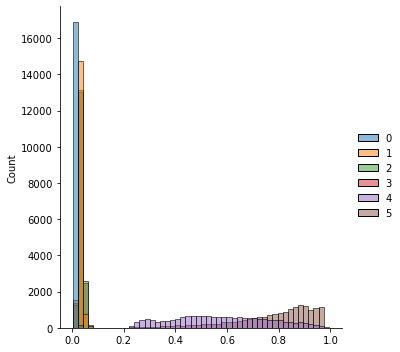

In [336]:
sns.displot(x_normalized,bins = 50)
plt.show

In [345]:
y=data1['value']
y

0          625000
1          600000
2        11000000
4        55000000
5          725000
           ...   
17120      550000
17121      130000
17122      130000
17123      475000
17124      325000
Name: value, Length: 17067, dtype: int64

In [347]:

transformer = Normalizer().fit(y)
y_normalized = transformer.transform(y)
print(y_normalized.shape)

ValueError: Expected 2D array, got 1D array instead:
array=[  625000   600000 11000000 ...   130000   475000   325000].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [337]:

data1_cat = data1.drop(['age', 'ova', 'pot', 'height', 'value', 'joined_days','total_stats'], axis=1)
data1_cat

,foot_Left,foot_Right,bp_CAM,bp_CB,bp_CDM,bp_CF,bp_CM,bp_GK,bp_LB,bp_LM,...,bp_RM,bp_RW,bp_RWB,bp_ST,nationality_1,nationality_2,nationality_3,club_1,club_2,club_3
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17120,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17121,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17122,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17123,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [338]:
x = np.concatenate((x_normalized, data1_cat), axis = 1)
x

array([[0.00623068, 0.01302778, 0.01302778, ..., 0.        , 0.        ,
        0.        ],
       [0.01112639, 0.02135064, 0.02135064, ..., 0.        , 0.        ,
        0.        ],
       [0.01172378, 0.02522388, 0.02522388, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01185439, 0.03688032, 0.04412467, ..., 0.        , 0.        ,
        0.        ],
       [0.01213476, 0.03761776, 0.04429188, ..., 1.        , 0.        ,
        0.        ],
       [0.01217487, 0.03990651, 0.05005223, ..., 1.        , 0.        ,
        0.        ]])

In [339]:
#Defining independent (X) and dependent (Y) for regression
X = x
Y = data1['value']
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,Y, test_size= 0.40, random_state=100)

#Running linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
r2_score(y_test, predictions)

0.24270604315320488

In [340]:
data1['value']

0          625000
1          600000
2        11000000
4        55000000
5          725000
           ...   
17120      550000
17121      130000
17122      130000
17123      475000
17124      325000
Name: value, Length: 17067, dtype: int64